Importing necessary packages

In [4]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Data Inspection/Cleaning

In [5]:
df = pd.read_csv('../Downloads/ALS 2017-2022 Donor Data.csv')

In [6]:
df.head()

,Donation ID,Donor ID,Received Date,Donation Amount,Campaign Id,Fund Description,Fund Name,Payment Type,First Gift Date,Last Gift Date,Gender,Age,Postal Code,City,Total Number of Donation,Total Amount of Donation,Retained
0,167648,1735748,2017-01-01,50.0,4053,Events:Walks,Events:Walks,Credit Card,2017-01-01,2017-01-01,Unknown or N/A,NaN,77494.0,Katy,3,130.0,1
1,168284,1736258,2017-01-01,500.0,7193,Unrestricted Giving:Memorials,Memorials,Other,2017-01-01,2017-01-01,Unknown or N/A,NaN,77493.0,Katy,1,500.0,0
2,168285,1736259,2017-01-01,1000.0,42,Individual Donor,Individual Donor,Other,2017-01-01,2017-01-01,Unknown or N/A,NaN,77018.0,Houston,1,1000.0,0
3,168286,1736260,2017-01-01,250.0,7193,Unrestricted Giving:Memorials,Memorials,Other,2017-01-01,2017-01-01,Unknown or N/A,NaN,77024.0,Houston,1,250.0,0
4,168343,1689213,2017-01-01,100.0,352,Individual Donor,Individual Donor,Other,2017-01-01,2017-01-01,Unknown or N/A,NaN,75048.0,Sachse,2,200.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57716 entries, 0 to 57715
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Donation ID               57716 non-null  int64  
 1   Donor ID                  57716 non-null  int64  
 2   Received Date             57716 non-null  object 
 3   Donation Amount           57716 non-null  float64
 4   Campaign Id               57716 non-null  int64  
 5   Fund Description          57706 non-null  object 
 6   Fund Name                 57706 non-null  object 
 7   Payment Type              57706 non-null  object 
 8   First Gift Date           57716 non-null  object 
 9   Last Gift Date            57716 non-null  object 
 10  Gender                    57227 non-null  object 
 11  Age                       807 non-null    float64
 12  Postal Code               45230 non-null  float64
 13  City                      45409 non-null  object 
 14  Total 

In [8]:
df.describe()

,Donation ID,Donor ID,Donation Amount,Campaign Id,Age,Postal Code,Total Number of Donation,Total Amount of Donation,Retained
count,57716.000000,5.771600e+04,5.771600e+04,57716.000000,807.000000,4.523000e+04,57716.000000,5.771600e+04,57716.000000
mean,218706.930331,1.753289e+06,2.264441e+02,6727.487716,59.706320,1.055690e+05,1.798808,5.961544e+02,0.385231
std,25417.369162,4.124397e+04,4.865913e+03,2308.139032,16.340036,1.603530e+06,1.273074,1.188119e+04,0.486654
min,164737.000000,1.600018e+06,0.000000e+00,0.000000,4.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,198120.750000,1.744834e+06,3.500000e+01,6106.000000,48.000000,7.516000e+04,1.000000,5.000000e+01,0.000000
50%,219596.500000,1.762728e+06,5.169000e+01,7042.000000,61.000000,7.709200e+04,1.000000,1.000000e+02,0.000000
75%,241405.250000,1.780089e+06,1.000000e+02,8202.000000,73.000000,7.825300e+04,2.000000,2.500000e+02,1.000000
max,261421.000000,1.803649e+06,1.083782e+06,9804.000000,100.000000,9.770000e+07,6.000000,1.105289e+06,1.000000


In [9]:
df['Fund Description'].unique()

array(['Events:Walks', 'Unrestricted Giving:Memorials',
       'Individual Donor', 'Events:Chapter Events (Non-Walk)',
       'Unrestricted Giving:Federated Donations',
       'Unrestricted Giving:Matching Gifts', 'Association Direct Mail',
       'Events:Sponsorship', 'AI - Comm Third Party',
       'Restricted Giving:Unsolicited restricted',
       'Unrestricted Giving:Direct Mail',
       'Unrestricted Giving:In-Kind Donation',
       'Unrestricted Giving:Corporate Donors',
       'Restricted Giving:Research', 'AI - ADMHM', 'Uncategorized',
       'Restricted: Solicited', 'Restricted Giving:Grants',
       'general merchandise sales', 'Community of Hope', 'Bequest',
       'Reimbursment', 'Major Gifts', 'Unsolicited: Restricted',
       'Unrestricted Giving:In-Kind Revenue', 'Federated Donation',
       'Unrestricted Giving:Individual Donor', 'Unrestricted Giving:DIY',
       'Restricted Giving:Solicited Restricted', nan], dtype=object)

Organizing donation amount data

In [10]:
# df['Donation Amount']=df['Donation Amount'].str.replace(',','')
df['Donation Amount'] = pd.to_numeric(df['Donation Amount'])

In [11]:
df['Donation Amount'] = df['Donation Amount'].round()
df['Donation Amount'].astype(int)

0          50
1         500
2        1000
3         250
4         100
         ... 
57711     515
57712     100
57713     103
57714    1250
57715     250
Name: Donation Amount, Length: 57716, dtype: int64

Summary Statistics by Fund Description

In [23]:
summary = df.groupby('Fund Description').agg({'Donation Amount':['sum', 'min', 'median', 'max', 'mean', 'median', 'count']})
summary

Donation Amount                    \
                                                     sum      min   median   
Fund Description                                                             
AI - ADMHM                                        3779.0     20.0     75.0   
AI - Comm Third Party                           515136.0      0.0     87.0   
Association Direct Mail                          97999.0      0.0     50.0   
Bequest                                        1201456.0  57000.0  60674.0   
Community of Hope                                14050.0     50.0    500.0   
Events:Chapter Events (Non-Walk)                901038.0      0.0    100.0   
Events:Sponsorship                             1256504.0     25.0   2500.0   
Events:Walks                                   5410820.0      1.0     50.0   
Federated Donation                                  25.0     25.0     25.0   
Individual Donor                                584293.0      0.0    100.0   
Major Gifts                                     603567.0   5000.0  23750.0   
Reimbursment                                       162.0     20.0     42.0   
Restricted Giving:Grants                        370866.0    300.0  10000.0   
Restricted Giving:Research                      134080.0      5.0    212.5   
Restricted Giving:Solicited Restricted          250338.0     26.0    103.0   
Restricted Giving:Unsolicited restricted        190131.0     25.0   5000.0   
Restricted: Solicited                           245624.0     10.0    100.0   
Uncategorized                                      707.0      1.0      1.0   
Unrestricted Giving:Corporate Donors              7841.0     41.0   1000.0   
Unrestricted Giving:DIY                          62817.0     10.0    100.0   
Unrestricted Giving:Direct Mail                  28218.0     10.0   1661.0   
Unrestricted Giving:Federated Donations          92051.0      0.0     42.0   
Unrestricted Giving:In-Kind Donation              2213.0      0.0      0.0   
Unrestricted Giving:In-Kind Revenue               5800.0      0.0      0.0   
Unrestricted Giving:Individual Donor            312690.0      0.0    100.0   
Unrestricted Giving:Matching Gifts               38426.0      0.0     80.0   
Unrestricted Giving:Memorials                   672182.0      4.0    100.0   
Unsolicited: Restricted                           1630.0     10.0     60.0   
general merchandise sales                          140.0     40.0     50.0   

                                                                             \
                                                max           mean   median   
Fund Description                                                              
AI - ADMHM                                   1000.0     107.971429     75.0   
AI - Comm Third Party                       30042.0     468.305455     87.0   
Association Direct Mail                      2500.0      98.195391     50.0   
Bequest                                   1083782.0  400485.333333  60674.0   
Community of Hope                           10000.0    1277.272727    500.0   
Events:Chapter Events (Non-Walk)            25000.0     420.064336    100.0   
Events:Sponsorship                          50000.0    3272.145833   2500.0   
Events:Walks                                50000.0     124.673272     50.0   
Federated Donation                             25.0      25.000000     25.0   
Individual Donor                            15000.0     272.524720    100.0   
Major Gifts                                250000.0   50297.250000  23750.0   
Reimbursment                                  100.0      54.000000     42.0   
Restricted Giving:Grants                    55000.0   13735.777778  10000.0   
Restricted Giving:Research                  28800.0    5586.666667    212.5   
Restricted Giving:Solicited Restricted     200000.0    5960.428571    103.0   
Restricted Giving:Unsolicited restricted    31700.0    7312.730769   5000.0   
Restricted: Solicited                      

In [26]:
summary.sort_values(by='sum', ascending= False)

KeyError: 'sum'

In [ ]:
df["First Gift Date"] = pd.to_datetime(df["First Gift Date"])

# grid = sns.FacetGrid(df, row='Fund Description')
# grid.map(sns.pointplot, 'First Gift Date', 'Donation Amount', palette='deep')
# grid.add_legend()

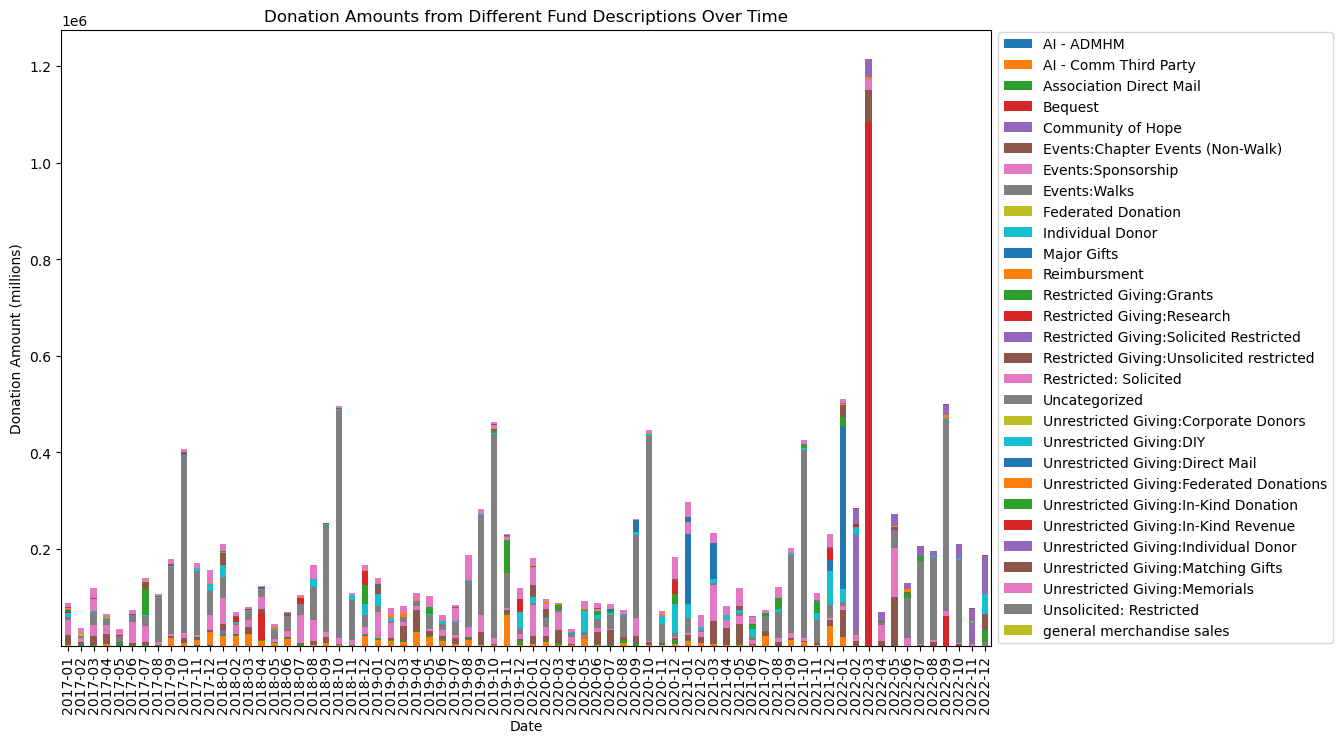

In [ ]:
df['Month-Year'] = df['First Gift Date'].dt.to_period('M')
grouped_df = df.groupby(['Month-Year', 'Fund Description'])['Donation Amount'].sum().reset_index()
pivoted_df = grouped_df.pivot(index='Month-Year', columns='Fund Description', values='Donation Amount')

ax = pivoted_df.plot(kind='bar', stacked=True, figsize=(12,8))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Donation Amounts from Different Fund Descriptions Over Time')
plt.xlabel('Date')
plt.ylabel('Donation Amount (millions)')

plt.show()

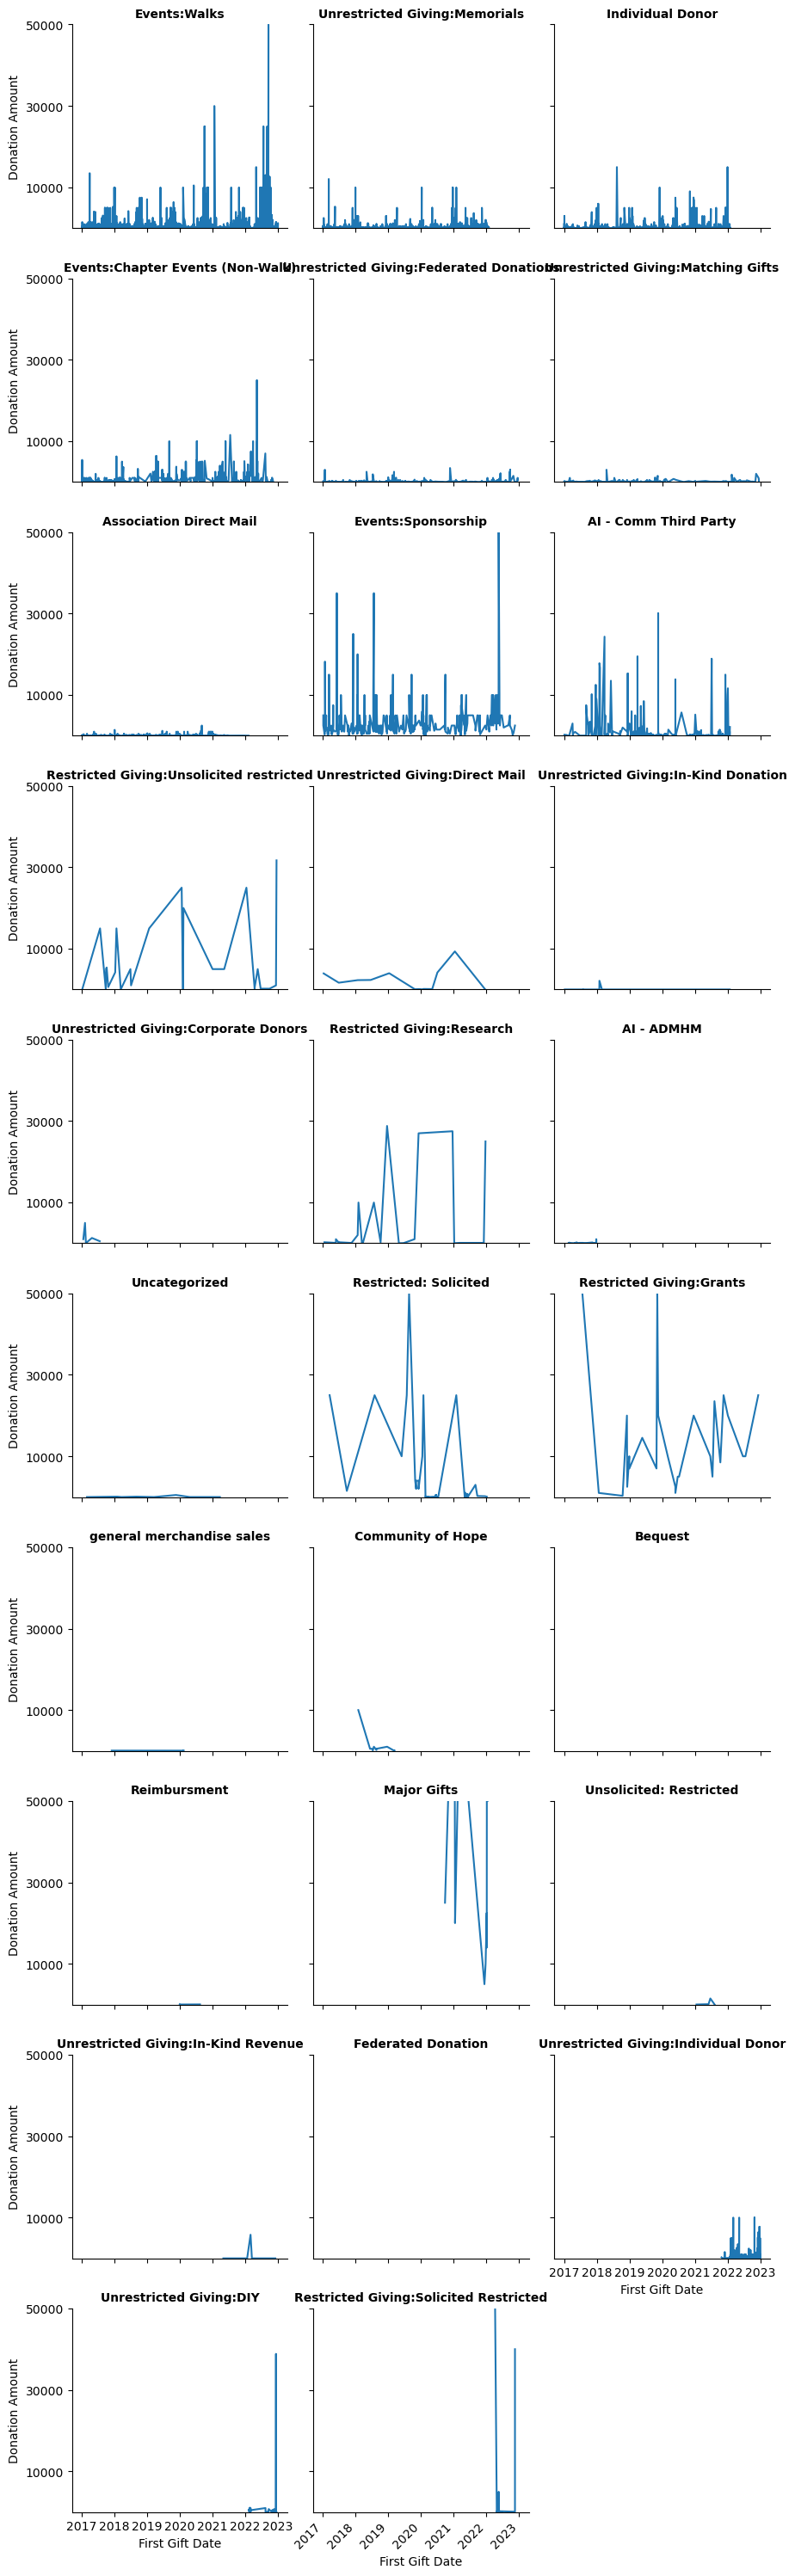

In [ ]:
g = sns.FacetGrid(df, col='Fund Description', col_wrap=3)
g.map(plt.plot, 'First Gift Date', 'Donation Amount')
g.set(ylim=(0, 50000), yticks=[10000, 30000, 50000])
g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()

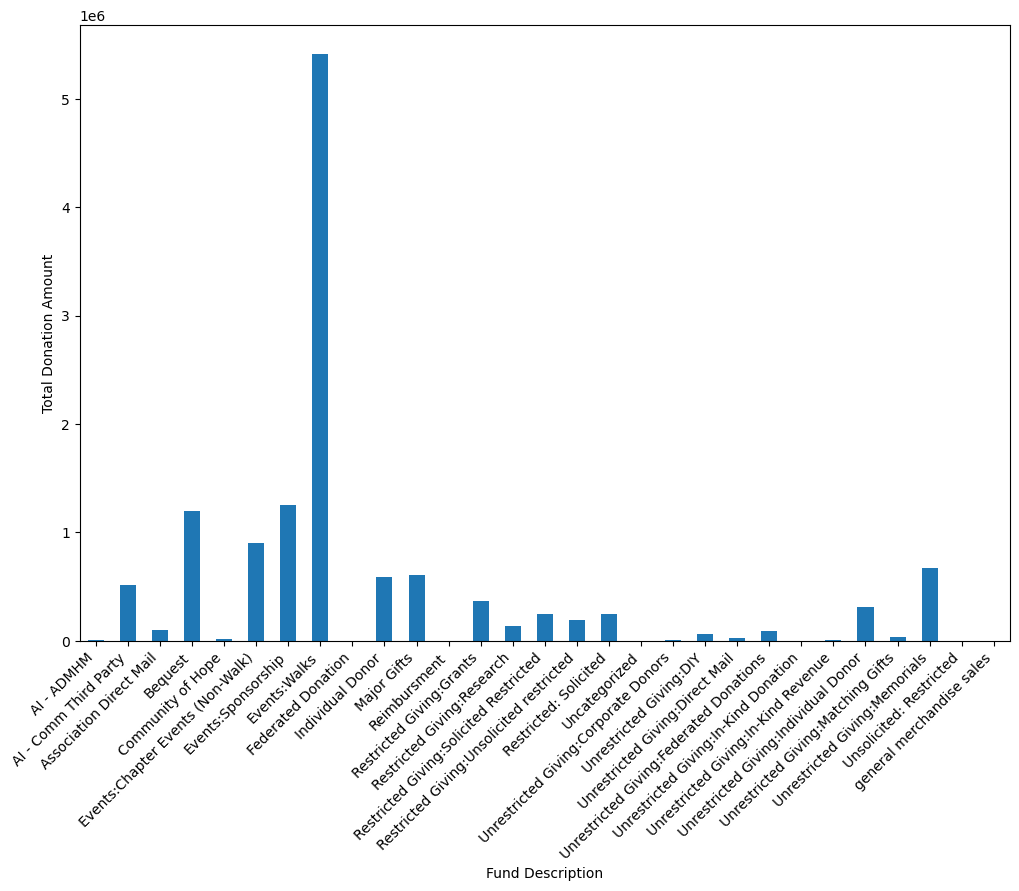

In [ ]:
fund_totals = df.groupby('Fund Description')['Donation Amount'].sum()

fund_totals.plot(kind='bar', figsize=(12, 8))

plt.xlabel('Fund Description')
plt.ylabel('Total Donation Amount')
plt.xticks(rotation=45, ha='right')

plt.show()

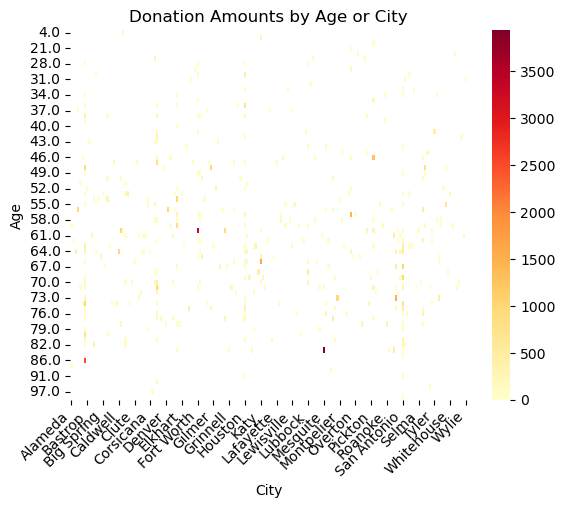

In [ ]:
donations_by_location = df.pivot_table(values='Donation Amount', index='Age', columns='City')

sns.heatmap(donations_by_location, cmap='YlOrRd')

plt.title('Donation Amounts by Age or City')
plt.xticks(rotation=45, ha='right')

plt.show()

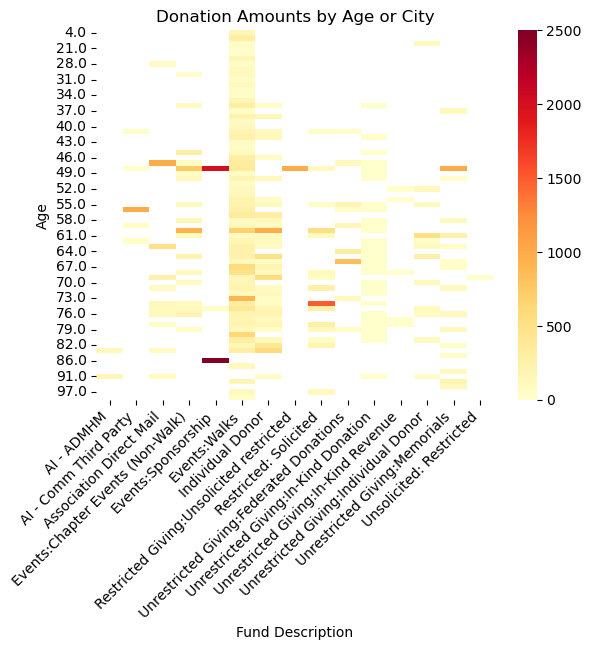

In [ ]:
donations_by_location = df.pivot_table(values='Donation Amount', index='Age', columns='Fund Description')

sns.heatmap(donations_by_location, cmap='YlOrRd')

plt.title('Donation Amounts by Age or City')
plt.xticks(rotation=45, ha='right')

plt.show()

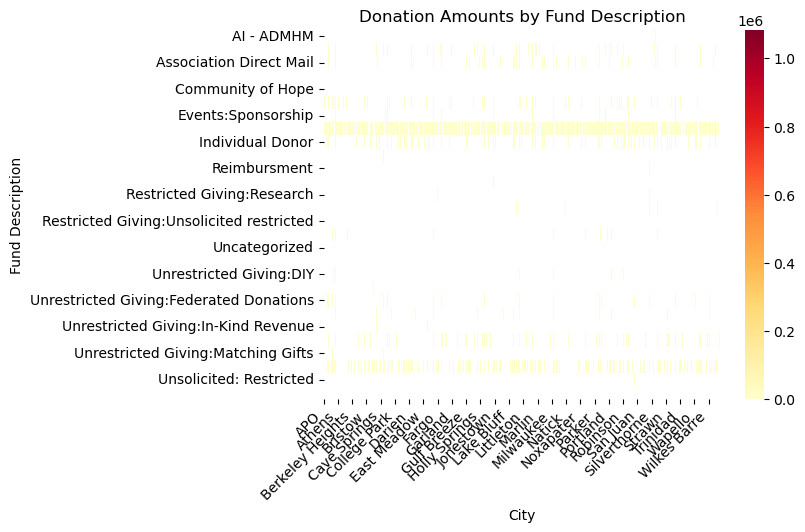

In [ ]:
donations_by_location = df.pivot_table(values='Donation Amount', index='Fund Description', columns='City')

sns.heatmap(donations_by_location, cmap='YlOrRd')

plt.title('Donation Amounts by Fund Description')
plt.xticks(rotation=45, ha='right')

plt.show()